In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bike_train=pd.read_excel("bike_train.xlsx")

In [4]:
bike_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [78]:
bike_test=pd.read_excel("bike_test.xlsx")

# ANÁLISIS EXPLORATIORIO DE DATOS

Analizamos las columnas y el tipo de dato de las mismas

In [6]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

Vemos si existen columnas con datos nulos

In [7]:
bike_train.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observamos la descripción de los datos de las columnas

In [8]:
bike_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


# Reducción de dimensionalidades

## Realizamos las distintas correlaciones para observar que valores poseen mayor relación con la cantidad de bicicletas usadas en esos instantes

### Correlación de Pearson

In [9]:
corr_pearson=bike_train.corr('pearson')

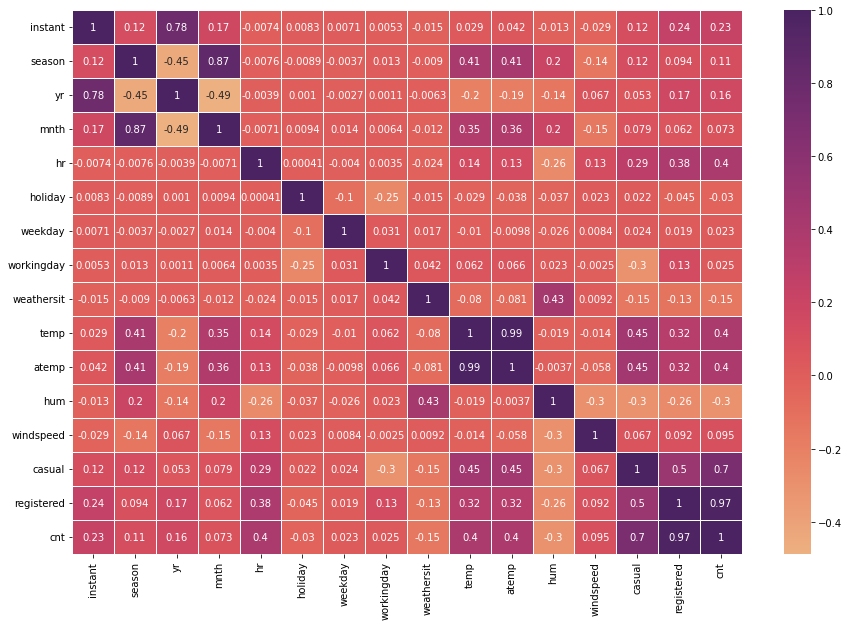

In [10]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_pearson, cmap= 'flare', linewidth = 0.5,annot=True)
plt.show()

### Correlación de Kendall

In [12]:
corr_kendall=bike_train.corr('kendall')

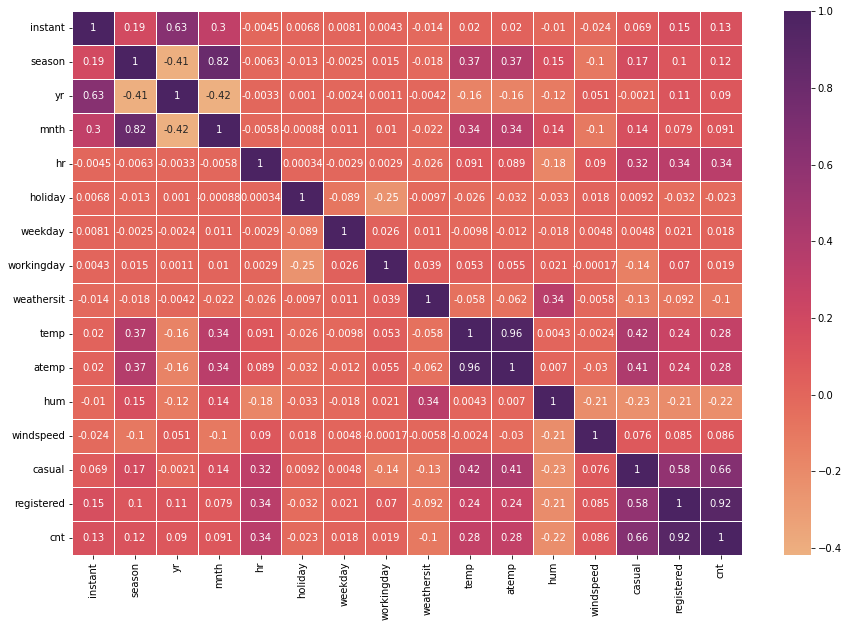

In [13]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_kendall, cmap= 'flare', linewidth = 0.5,annot=True)
plt.show()

### Correlación de Spearman

In [14]:
corr_spear=bike_train.corr('spearman')

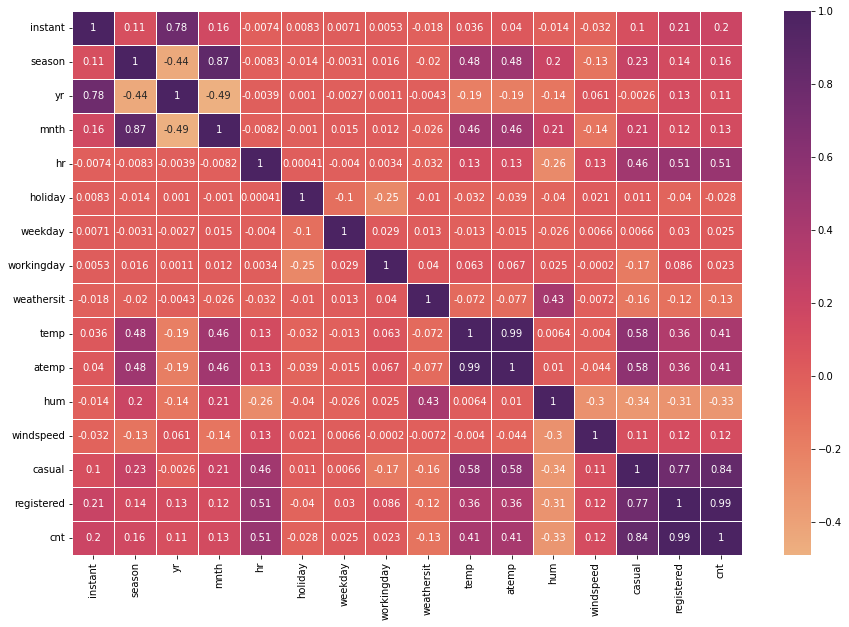

In [15]:
plt.subplots(figsize=(15,10))
sns.heatmap(corr_spear, cmap= 'flare', linewidth = 0.5,annot=True)
plt.show()

In [117]:
bike_train_red=bike_train.drop(columns={"dteday","instant","registered","casual"})

Analizamos la cantidad de bicicletas alquiladas de acuerdo a la hora del dia

<AxesSubplot:xlabel='hr', ylabel='cnt'>

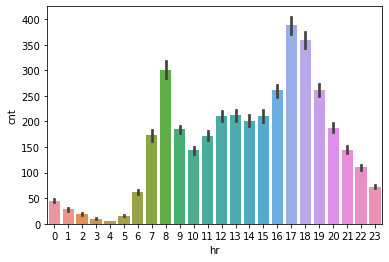

In [17]:
sns.barplot(data=bike_train,x='hr',y='cnt')

Podemos ver que los horarios donde mas se rentan bicicletas son las 8, 17, 18, probablemente porque es el horario en donde la mayoría de las personas entran y salen del trabajo respectivamente

Analizamos como varía el consumo de las bicicletas respecto de la temperatura

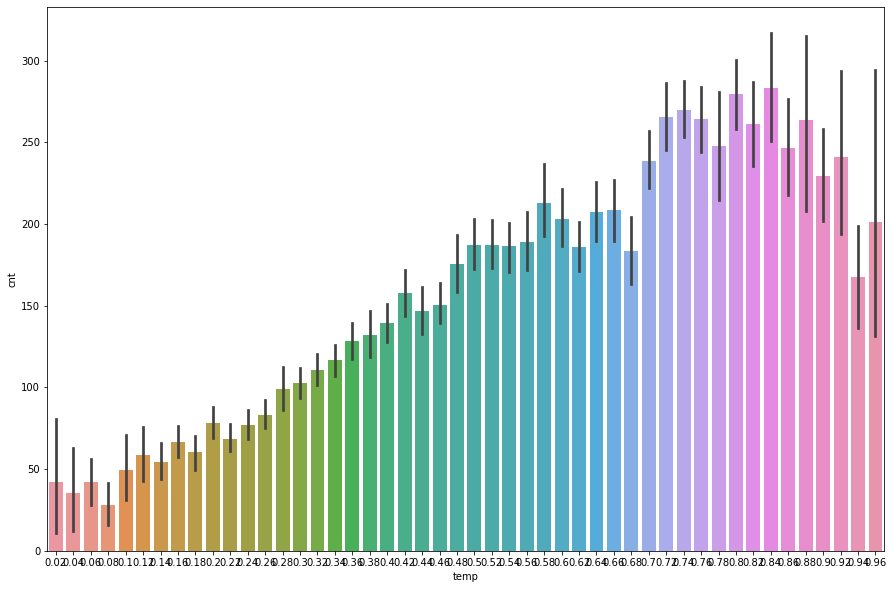

In [18]:
plt.subplots(figsize=(15,10))
sns.barplot(data=bike_train_red,x='temp',y='cnt')
plt.show()

Se observa que el consumo aumenta a medida que se tenga temperaturas mas cálidas, sin llegar a los valores extremos

Reescalamos los datos

In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
bike_train_scaled= bike_train_red.drop(columns={'cnt'})
bike_train_scaled=pd.DataFrame(scaler.fit_transform(bike_train_scaled),columns=bike_train_scaled.columns)

In [119]:
bike_train_scaled.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,-1.111992,-0.622872,-1.319684,-1.672062,-0.168951,1.49147,-1.471437,-0.668395,-1.196932,-0.949079,0.918266,-1.566592
1,-1.111992,-0.622872,-1.319684,-1.527378,-0.168951,1.49147,-1.471437,-0.668395,-1.302995,-1.038688,0.868422,-1.566592
2,-1.111992,-0.622872,-1.319684,-1.382694,-0.168951,1.49147,-1.471437,-0.668395,-1.302995,-1.038688,0.868422,-1.566592
3,-1.111992,-0.622872,-1.319684,-1.238009,-0.168951,1.49147,-1.471437,-0.668395,-1.196932,-0.949079,0.619206,-1.566592
4,-1.111992,-0.622872,-1.319684,-1.093325,-0.168951,1.49147,-1.471437,-0.668395,-1.196932,-0.949079,0.619206,-1.566592


# Implementación de modelos

## K Vecinos Cercanos

In [161]:
from sklearn.model_selection import train_test_split
X=bike_train_scaled
y=bike_train_red.cnt

Dividimos los datos para entrenamiento y testeo

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30,random_state=42)

In [65]:
from sklearn.neighbors import KNeighborsRegressor

Implementamos el modelo de regresion KNN

In [66]:
n_neighbors=5
regression_knn= KNeighborsRegressor(n_neighbors=n_neighbors)

Ingresamos los valores para que el modelo aprenda

In [67]:
regression_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [68]:
y_train_pred = regression_knn.predict(X_train)
y_test_pred = regression_knn.predict(X_test)

### Evaluación de precisión del modelo

In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score

In [70]:
print('La precisión del KNN en set de train es:', regression_knn.score (X_train,y_train))
print('La precisión del KNN en set de test es:', regression_knn.score (X_test,y_test))

La precisión del KNN en set de train es: 0.7456371805306675
La precisión del KNN en set de test es: 0.6035259014639873


In [71]:
rsme=np.sqrt(mean_squared_error(y_test,y_test_pred,squared=False))
print("El error es:",rsme)

El error es: 9.707564013464983


# Predicción de datos

Tomamos en cuenta las columnas con las que dimensionamos 

In [137]:
X_pred=bike_test.drop(columns={"dteday","instant"})

In [82]:
y_test_prediction=regression_knn.predict(X_pred)

In [83]:
pred=pd.DataFrame(y_test_prediction,columns={'pred'})

In [33]:
pred=pred.astype(int)

In [128]:
pred.to_csv("diegobarrios224.csv",index=False)

## Arboles de Decisión

In [84]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=8)

In [85]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [86]:
y_train_pred = tree_regressor.predict (X_train)
y_test_pred = tree_regressor.predict (X_test)

In [87]:
print('La precisión del modelo de árbol de regresión en set de train es:', tree_regressor.score (X_train,y_train))
print('La precisión del modelo de árbol de regresión en set de test es:', tree_regressor.score (X_test,y_test))

La precisión del modelo de árbol de regresión en set de train es: 0.8538381541992287
La precisión del modelo de árbol de regresión en set de test es: 0.8222188494828603


In [88]:
rsme=np.sqrt(mean_squared_error(y_test,y_test_pred,squared=False))
print("El error es:",rsme)

El error es: 7.943794231283275


In [89]:
DTR_pred=tree_regressor.predict(X_pred)

In [143]:
df_tree=pd.DataFrame(DTR_pred,columns={'pred'})

In [144]:
df_tree.to_csv("C:/Users/Adm/Desktop/diegobarrios224.csv")

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [91]:
randomf = RandomForestRegressor()

randomf_scores = cross_val_score(randomf, X, y, cv=10)
randomf.fit(X_train, y_train)

RandomForestRegressor()

In [93]:
y_train_pred_rf = randomf.predict(X_train)
y_test_pred_rf = randomf.predict(X_test)

In [94]:
rmse_train_rf = np.sqrt((mean_squared_error(y_train, y_train_pred_rf,squared=False)))
rmse_test_rf = np.sqrt((mean_squared_error(y_test, y_test_pred_rf,squared=False)))

In [95]:
print('La precisión del modelo de Random Forest en train es:', randomf.score (X_train,y_train))
print('La precisión del modelo de Random Forest en test es:', randomf.score (X_test,y_test))

La precisión del modelo de Random Forest en train es: 0.9919636187770251
La precisión del modelo de Random Forest en test es: 0.9374592159897489


In [96]:
y_pred_rf= randomf.predict(X_pred)

In [99]:
pred_rf.astype(int)

,pred
0,83
1,84
2,84
3,84
4,84
...,...
5375,181
5376,181
5377,182
5378,182


## XGBoost

In [122]:
from xgboost import XGBRegressor
import xgboost as xgb

In [127]:
modelo_XGB= XGBRegressor()

In [128]:
modelo_XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [130]:
y_train_pred_xgb = modelo_XGB.predict(X_train)
y_test_pred_xgb = modelo_XGB.predict(X_test)

In [131]:
print('Score en datos de train:', modelo_XGB.score(X_train, y_train))
print('Score en datos de test:', modelo_XGB.score(X_test, y_test))

Score en datos de train: 0.9805758278644431
Score en datos de test: 0.9388510542570098


In [132]:
rsme_test_xgb=np.sqrt(mean_squared_error(y_test,y_test_pred_xgb,squared=False))
rsme_train_xgb=np.sqrt(mean_squared_error(y_train,y_train_pred_xgb,squared=False))

print("Error de train:",rsme_train_xgb)
print("Error de test",rsme_test_xgb)

Error de train: 4.604423514174475
Error de test 6.083504048767142


Optimización de hiperparámetros

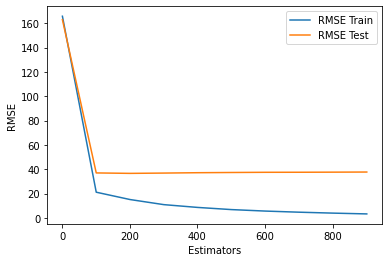

In [133]:
rmse_train_list = []
rmse_test_list = []
estimators = np.arange(1,1000,100)
for n_estimators in estimators:
    xgb = XGBRegressor(n_estimators=n_estimators)
    xgb.fit(X_train, y_train)
    
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    
    rmse_train_list.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test_list.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

scores_train = np.array(rmse_train_list)
scores_test = np.array(rmse_test_list)
plt.plot(estimators,rmse_train_list, label = 'RMSE Train')
plt.plot(estimators,rmse_test_list, label = 'RMSE Test')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Estimators')
plt.show()

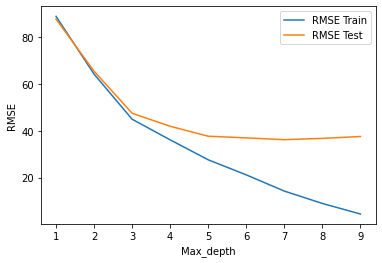

In [134]:
rmse_train_lista = []
rmse_test_lista = []
profundidades = np.arange(1,10)
for max_depth in profundidades:
    xgb = XGBRegressor(max_depth=max_depth)
    xgb.fit(X_train, y_train)
    
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    
    rmse_train_lista.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    rmse_test_lista.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

scores_train = np.array(rmse_train_lista)
scores_test = np.array(rmse_test_lista)
plt.plot(profundidades,rmse_train_lista, label = 'RMSE Train')
plt.plot(profundidades,rmse_test_lista, label = 'RMSE Test')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('Max_depth')
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

In [143]:
grid_values = {'learning_rate': [0.001, 0.01, 0.1],
               'n_estimators':np.arange(50,450,50),
               'max_depth': [3,4,5,6,7]}
grid_xgb = GridSearchCV(XGBRegressor(objective = 'reg:squarederror', eval_metric="rmse",random_state=42), param_grid = grid_values)
grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)


In [165]:
modelo_XGB_opt = XGBRegressor(n_estimators=400, max_depth=7, learning_rate=0.1)
modelo_XGB_opt.fit(X_train, y_train)
y_test_pred = modelo_XGB_opt.predict(X_test)
print('Score en datos de train:', modelo_XGB_opt.score(X_train, y_train))
print('Score en datos de test:', modelo_XGB_opt.score(X_test, y_test))
y_train_pred = modelo_XGB_opt.predict(X_train)
y_test_pred = modelo_XGB_opt.predict(X_test)
rmse_xgb_opt=np.sqrt(mean_squared_error(y_test,y_test_pred,squared=False))
print("Error:", rmse_xgb_opt)

Score en datos de train: 0.9936498213888981
Score en datos de test: 0.944568012985382
Error: 5.936037961197715


In [166]:
y_test_pred_xgb= modelo_XGB_opt.predict(X_pred)

In [167]:
pred_XGB=pd.DataFrame(y_test_pred_xgb,columns={'pred'})

In [168]:
pred_XGB=pred_XGB.astype(int)

In [169]:
pred_XGB.head()

,pred
0,103
1,110
2,114
3,110
4,110


In [170]:
pred_XGB.to_csv("diegobarrios224.csv",index=False)